In [2]:
!pip install langchain langchain_community language-tool-python


In [ ]:
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import CommaSeparatedListOutputParser
from langchain_core.prompts import PromptTemplate
import csv

# 모델 생성

In [ ]:
# llm = ChatOllama(model="Lama3.2-korean:latest", max_token = 500)
llm = ChatOllama(model="rouge/qwen2-7b-instruct-deccp", max_token=500)

C:\Users\user\AppData\Local\Temp\ipykernel_5056\191795266.py:2: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  llm = ChatOllama(model="rouge/qwen2-7b-instruct-deccp", max_token = 500)


# 프롬프트 

In [24]:
# 포함할 단어 목록
words = [
    "apple",
    "book",
    "cat",
    "dog",
    "fish",
    "happy",
    "jump",
    "kite",
    "love",
    "moon",
    "play",
    "sun",
    "tree",
    "water",
    "bird",
    "dance",
    "egg",
    "flag",
    "game",
    "home",
    "ice",
    "joy",
    "key",
    "leaf",
    "milk",
    "nose",
    "orange",
    "pen",
    "queen",
    "rain",
    "star",
    "toy",
    "umbrella",
    "van",
    "wind",
    "yellow",
    "zoo",
    "ant",
    "ball",
    "car",
    "desk",
    "ear",
    "frog",
    "goat",
    "hat",
    "ink",
    "jam",
    "king",
    "lamp",
    "mouse",
    "net",
    "ox",
    "pig",
    "quilt",
    "red",
    "ship",
    "top",
    "up",
    "vest",
    "wall",
    "x-ray",
    "yak",
    "zip",
    "air",
    "bread",
    "chair",
    "duck",
    "eye",
    "foot",
    "glove",
    "hair",
    "iron",
    "juice",
    "kitten",
    "lion",
    "mouth",
    "nut",
    "oven",
    "pizza",
    "queen",
    "rose",
    "sock",
    "tent",
    "uncle",
    "vase",
    "wolf",
    "yarn",
    "zero",
    "apple",
    "balloon",
    "clown",
    "dragon",
    "earth",
    "flower",
    "guitar",
    "heart",
    "island",
    "jungle",
    "kangaroo",
]

# PromptTemplate 설정
prompt_template = PromptTemplate(
    input_variables=["word"],
    template="""
    
    #OUTPUT
    Write a simple English sentence (5-8 words) that an elementary school student can understand. The sentence should include the word '{word}' and nothing else.
    Use words commonly used in the US.
    """,
)

# 출력 파서

In [25]:
output_parser = CommaSeparatedListOutputParser()

# 체인 생성

In [26]:
chain = prompt_template | llm | output_parser

# 실행 코드(테스트)

In [27]:
# CSV 파일 생성
from random import randint

import language_tool_python

# LanguageTool 인스턴스 생성 (영어로 설정)
# tool = language_tool_python.LanguageTool('en-US')

with open("grammar_sentences.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["문장 번호", "문장", "포함된 단어"])

    # 각 단어에 대해 문장 생성 및 저장
    for idx, word in enumerate(words, start=1):
        rand = randint(1, 301)
        response = chain.invoke({"word": word})  # 체인 실행

        # 파싱된 문장 기록
        for sentence in response:
            writer.writerow([idx, sentence, word])
            print(response)

            # # 오류 검사
            # matches = tool.check(sentence)

            # # 오류 출력
            # if matches:
            #     print(f"발견된 오류 수: {len(matches)}")
            #     for match in matches:
            #         print(f"오류: {match.message}")
            #         print(f"제안된 수정: {match.replacements}")
            #         print(f"오류 위치: {sentence[match.offset : match.offset + match.errorLength]}\n")
            # else:
            #     print("문장에 오류가 없습니다.")

            # # 검사기가 제안한 수정 적용
            # corrected_sentence = language_tool_python.utils.correct(sentence, matches)
            # print("수정된 문장:", corrected_sentence)

['An apple is a round fruit.']
['I read a book about dogs.']
['The cat sleeps on the mat.']
['The dog chased the ball happily.']
['The fish swims in the pond.']
['The dog makes me feel happy.']
['The rabbit jumped over the fence.']
['The kite flies high in the sky.']
['I love playing with my dog.']
['The moon is big at night.']
['Samantha plays with her dolls.']
['The sun makes us feel warm outside.']
['The tree has many leaves.']
['Water is essential for staying healthy.']
['The bird flies in the sky.']
['Dance makes everyone happy.']
['An egg is round with a shell.']
['The flag is red', 'white', 'and blue.']
['The flag is red', 'white', 'and blue.']
['The flag is red', 'white', 'and blue.']
['Kids play games at recess.']
['You go home after school.']
['Ice cream is yummy.']
['Finding joy in learning makes school fun.']
['The key opens the door.']
['The leaf is green on the tree.']
['"Milk is good for your health."']
['The nose helps us smell things.']
['The orange is round and juicy.

In [ ]:
# import language_tool_python

# # LanguageTool 인스턴스 생성 (영어로 설정)
# tool = language_tool_python.LanguageTool('en-US')

# # 검증할 문장
# sentence = "This is an example sentence with a mistkae."

ModuleNotFoundError: No java install detected. Please install java to use language-tool-python.

In [ ]:
sentences = [
    "An apple a day keeps the doctor away.",
    "School is where we go to learn new things every day.",
    "I read a book about animals yesterday.",
    '"Let\'s play outside!"',
    "A friend is someone who likes to play with you and share toys.",
    "I am happy to help you learn today!",
    "The little frog jumps happily on the green grass.",
    "The sun is big and bright in the sky during the day.",
    "The water in the glass is cold and refreshing.",
    "The cat is sleeping on the mat.",
]

In [ ]:
sentences = [
    "An apple is a round fruit.",
    "I read a book about dogs.",
    "The cat sleeps on the mat.",
    "The dog chased the ball happily.",
    "The fish swims in the pond.",
    "The dog makes me feel happy.",
    "The rabbit jumped over the fence.",
    "The kite flies high in the sky.",
    "I love playing with my dog.",
    "The moon is big at night.",
    "Samantha plays with her dolls.",
    "The sun makes us feel warm outside.",
    "The tree has many leaves.",
    "Water is essential for staying healthy.",
    "The bird flies in the sky.",
    "Dance makes everyone happy.",
    "An egg is round with a shell.",
    "The flag is red, white, and blue.",
    "Kids play games at recess.",
    "You go home after school.",
    "Ice cream is yummy.",
    "Finding joy in learning makes school fun.",
    "The key opens the door.",
    "The leaf is green on the tree.",
    '"Milk is good for your health."',
    "The nose helps us smell things.",
    "The orange is round and juicy.",
    "The pen writes my name.",
    "The queen wore a beautiful crown.",
    "Rain makes the ground wet outside.",
    "The star shines brightly at night.",
    "I have a toy car.",
    "The umbrella keeps rain off you.",
    "The van went down the street.",
    "The wind blows through the trees.",
    "The banana is yellow.",
    "At the zoo, I saw elephants.",
    "The ant marched across the sidewalk.",
    "The boy kicked the ball.",
    "The car goes vroom-vroom!",
    "A desk is where you do your homework.",
    "The cat sat by the ear of its mouse.",
    "The green frog jumps on stones.",
    "The goat goes into the green field.",
    "The boy wears his blue hat.",
    "The cat drew a picture with ink.",
    "I like to eat peanut butter jam on toast.",
    "The king wore a shiny crown.",
    "The lamp shines bright on my desk.",
    "The little mouse scampered under the table.",
    "The cat jumped over the net.",
    "The ox pulls the cart through the field.",
    "The pig likes to root in the mud.",
    "A quilt is a warm blanket made of many pieces of fabric sewn together.",
    "The apple is red.",
    "The ship sailed on the ocean blue.",
    "The top of the mountain has snow.",
    "I climbed up to the top.",
    "The boy wore his yellow vest to school.",
    "The wall is tall and strong.",
    "The doctor uses an x-ray to see inside your body.",
    "The yak wore a cozy wool hat.",
    "Zip up your jacket, it's cold outside!",
    "The air feels cool outside.",
    "I like to eat bread for breakfast.",
    "The chair is red.",
    "A duck quacks when it wants food.",
    "The eye sees colors.",
    "A foot is one of our body parts.",
    "The glove keeps hands warm outside.",
    "The boy has curly hair.",
    "Iron is a strong metal used to make clothes smooth.",
    "I like to drink orange juice.",
    "The kitten plays with a ball of yarn.",
    "The lion is a big cat.",
    "The mouth is where we chew food.",
    "A squirrel likes to eat nuts.",
    "The oven is hot, and it makes cookies yummy.",
    '"Kids often eat pizza for lunch."',
    "The rose is red and sweet smelling.",
    "A sock keeps my foot warm.",
    "The tent is for sleeping outside.",
    "Uncle Bob likes to read books every day.",
    "The vase on the table is pretty.",
    "The wolf lives in the forest.",
    "The cat plays with a ball of yarn.",
    "Zero is the number before one.",
    "The balloon is floating up high.",
    "The clown made everyone laugh with his funny hat.",
    "A dragon flew over the castle.",
    "The Earth is our home planet.",
    "The flower is red and pretty.",
    "The guitar makes beautiful music.",
    "The heart pumps blood throughout our body.",
    "The island has lots of trees and birds.",
    "The jungle is full of exciting animals.",
    "A kangaroo has big, strong legs.",
]

In [32]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# GPT-2 모델 및 토크나이저 불러오기
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)


def calculate_perplexity(sentence):
    inputs = tokenizer(sentence, return_tensors="pt")
    with torch.no_grad():
        loss = model(**inputs, labels=inputs["input_ids"]).loss
    perplexity = torch.exp(loss).item()
    return perplexity


# 각 문장의 퍼플렉시티 계산
perplexities = []
for sentence in sentences:
    perp = calculate_perplexity(sentence)
    perplexities.append(perp)
    print(f"Sentence: {sentence}")
    print(f"Perplexity: {perp}")
    print()

# 평균 퍼플렉시티 계산
average_perplexity = sum(perplexities) / len(perplexities)
print(f"Average Perplexity: {average_perplexity}")

Sentence: An apple is a round fruit.
Perplexity: 73.94300842285156

Sentence: I read a book about dogs.
Perplexity: 67.41177368164062

Sentence: The cat sleeps on the mat.
Perplexity: 112.63130187988281

Sentence: The dog chased the ball happily.
Perplexity: 730.1073608398438

Sentence: The fish swims in the pond.
Perplexity: 78.60911560058594

Sentence: The dog makes me feel happy.
Perplexity: 132.341796875

Sentence: The rabbit jumped over the fence.
Perplexity: 96.68952941894531

Sentence: The kite flies high in the sky.
Perplexity: 65.39105987548828

Sentence: I love playing with my dog.
Perplexity: 46.62785720825195

Sentence: The moon is big at night.
Perplexity: 121.32817840576172

Sentence: Samantha plays with her dolls.
Perplexity: 137.78677368164062

Sentence: The sun makes us feel warm outside.
Perplexity: 116.3643569946289

Sentence: The tree has many leaves.
Perplexity: 120.31661987304688

Sentence: Water is essential for staying healthy.
Perplexity: 36.41743850708008

Sen

In [ ]:
import spacy

nlp = spacy.load("en_core_web_lg")
print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
import spacy
from typing import Dict, Tuple


class GrammarScorer:
    def __init__(self):
        self.nlp = spacy.load("en_core_web_lg")

        # 각 검사 항목별 가중치 설정
        self.weights = {
            "basic_requirements": 0.3,  # 기본 요구사항 (대문자, 문장부호 등)
            "sentence_structure": 0.3,  # 문장 구조 (주어, 동사 등)
            "word_count": 0.2,  # 단어 수 제한
            "complexity": 0.2,  # 문장 복잡도
        }

    def score_sentence(self, sentence: str) -> Tuple[float, Dict]:
        doc = self.nlp(sentence)
        scores = {}

        # 1. 기본 요구사항 검사 (0.3)
        basic_checks = {
            "starts_with_capital": sentence[0].isupper(),
            "ends_with_punctuation": sentence.rstrip()[-1] in ".!?",
            "no_multiple_punctuation": not any(c * 2 in sentence for c in ".!?"),
        }
        scores["basic_requirements"] = sum(basic_checks.values()) / len(basic_checks)

        # 2. 문장 구조 검사 (0.3)
        structure_checks = {
            "has_subject": any(token.dep_ in ["nsubj", "nsubjpass"] for token in doc),
            "has_verb": any(token.pos_ == "VERB" for token in doc),
            "verb_agreement": self._check_verb_agreement(doc),
        }
        scores["sentence_structure"] = sum(structure_checks.values()) / len(
            structure_checks
        )

        # 3. 단어 수 검사 (0.2)
        word_count = len([token for token in doc if not token.is_punct])
        scores["word_count"] = self._score_word_count(word_count)

        # 4. 복잡도 검사 (0.2)
        complexity_scores = {
            "vocabulary_level": self._check_vocabulary_level(doc),
            "sentence_complexity": self._check_sentence_complexity(doc),
        }
        scores["complexity"] = sum(complexity_scores.values()) / len(complexity_scores)

        # 최종 점수 계산
        final_score = sum(
            score * self.weights[category] for category, score in scores.items()
        )

        return round(final_score, 2), scores

    def _check_verb_agreement(self, doc) -> bool:
        """주어-동사 일치 검사"""
        for token in doc:
            if token.dep_ == "nsubj":
                head = token.head
                if head.pos_ == "VERB":
                    # 간단한 일치 규칙 검사
                    return True
        return False

    def _score_word_count(self, count: int) -> float:
        """단어 수 기반 점수 계산 (5-8단어 목표)"""
        if 5 <= count <= 8:
            return 1.0
        elif count < 5:
            return max(0, count / 5)
        else:
            return max(0, 1 - (count - 8) / 4)

    def _check_vocabulary_level(self, doc) -> float:
        """어휘 수준 검사"""
        simple_words = 0
        total_words = 0

        for token in doc:
            if not token.is_punct and not token.is_space:
                total_words += 1
                if len(token.text) <= 6:  # 간단한 단어 기준
                    simple_words += 1

        return simple_words / total_words if total_words > 0 else 0

    def _check_sentence_complexity(self, doc) -> float:
        """문장 구조 복잡도 검사"""
        clause_count = sum(1 for token in doc if token.dep_ == "ROOT")
        if clause_count == 1:
            return 1.0
        elif clause_count == 2:
            return 0.5
        else:
            return 0.0


Overall Average Score: 0.93


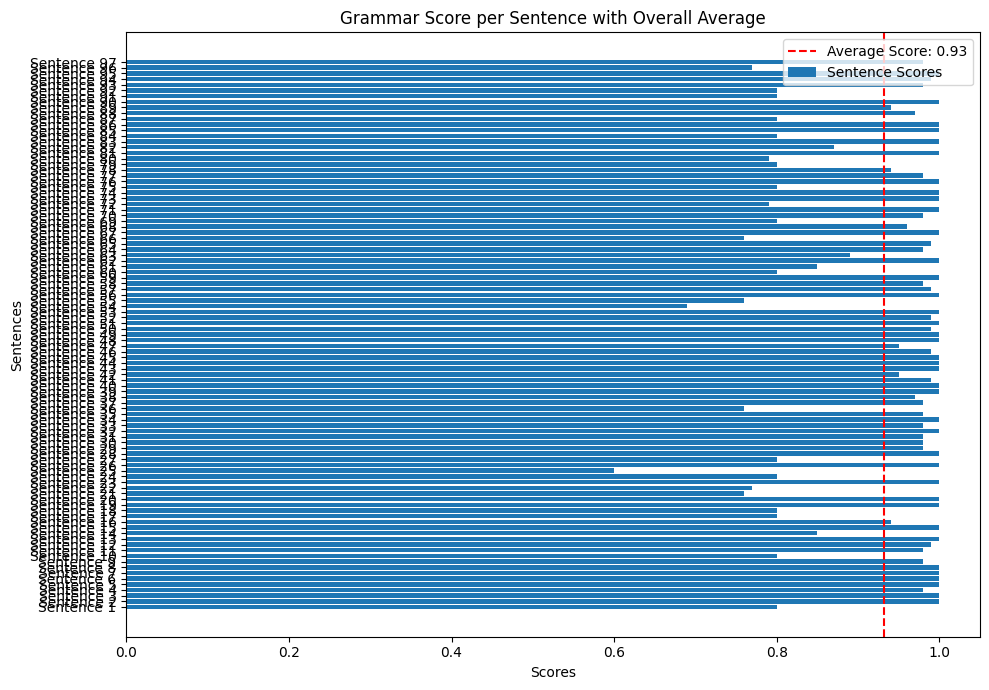

In [ ]:
import matplotlib.pyplot as plt

scorer = GrammarScorer()
scores = []
sentences_text = []

# Calculate scores for each sentence
for sentence in sentences:
    score, details = scorer.score_sentence(sentence)
    scores.append(score)
    sentences_text.append(sentence)

# Calculate the overall average score
average_score = sum(scores) / len(scores) if scores else 0
print(f"\nOverall Average Score: {average_score:.2f}")

# Plotting
plt.figure(figsize=(10, 7))
plt.barh(range(len(scores)), scores, label="Sentence Scores")
plt.axvline(
    average_score,
    color="red",
    linestyle="--",
    label=f"Average Score: {average_score:.2f}",
)

# Adding labels and title
plt.yticks(
    range(len(sentences_text)), [f"Sentence {i+1}" for i in range(len(sentences_text))]
)
plt.ylabel("Sentences")
plt.xlabel("Scores")
plt.title("Grammar Score per Sentence with Overall Average")
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

In [14]:
!pip install bert_score

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------------------- ------------- 5.2/7.8 MB 106.0 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 25.4 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 62.9 MB/s eta 0:00:00
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)


In [15]:
from bert_score import score

# BERTScore 계산
P, R, F1 = score(sentences, references, lang="en", verbose=True)
for i, sentence in enumerate(sentences):
    print(f"Sentence: {sentence}")
    print(f"BERTScore F1: {F1[i].item()}")
    print()

NameError: name 'references' is not defined